### Imports

In [2]:
import pickle
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda, Conv2D, MaxPool2D, Reshape, Conv2DTranspose
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from keras import backend as K
from keras.models import load_model
import random
import matplotlib.pyplot as plt

### Load the training and testing data

In [3]:
with open('hw4_tr7.pkl', 'rb') as pickle_file:
    train_data = pickle.load(pickle_file)
print(train_data.shape)

(6265, 28, 28)


In [4]:
with open('hw4_te7.pkl', 'rb') as pickle_file:
    test_data = pickle.load(pickle_file)
print(test_data.shape)

(1028, 28, 28)


### Adding Channel Dimension

In [5]:
train_data = np.expand_dims(train_data, axis=3)

In [6]:
test_data = np.expand_dims(test_data, axis=3)

### Variational AutoEncoder
Model is built using the following
1. Encoder - 3 Convolutional Layers following a Dense Layer
2. Reparameterization
3. Decoder - 2 Dense Layers and 4 Transposed Convolution Layers

In [7]:
def VAE_model(ip_shape = [28, 28, 1], latent_dim = 4):
    input_img = Input(ip_shape) 
    
    encoder_model = Sequential()   
    encoder_model.add(Conv2D(16, kernel_size = (5, 5), input_shape = ip_shape, activation = 'relu'))
    encoder_model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
    encoder_model.add(Conv2D(64, kernel_size = (2, 2), activation = 'relu'))
    encoder_model.add(Flatten())
    encoder_model.add(Dense(128))
    
    encoder_output = encoder_model(input_img)
    
    z_mean = Dense(latent_dim)(encoder_output)
    z_log_var = Dense(latent_dim)(encoder_output)
     
    epsilon =  K.random_normal(shape=K.shape(z_mean))
    #reparameterize
    z = z_mean + K.exp(0.5 + z_log_var) * epsilon
    
    decoder_model = Sequential()
    decoder_model.add(Dense(latent_dim*2, input_shape = z.get_shape(), activation = 'relu'))
    decoder_model.add(Dense(28*28, activation = 'relu'))
    decoder_model.add(Reshape(target_shape = (28,28, 1)))
    decoder_model.add(Conv2DTranspose(64, kernel_size = (2, 2), activation = 'relu', padding='SAME'))
    decoder_model.add(Conv2DTranspose(32, kernel_size = (3, 3), activation = 'relu', padding='SAME'))
    decoder_model.add(Conv2DTranspose(16, kernel_size = (5, 5), activation = 'relu', padding='SAME'))
    decoder_model.add(Conv2DTranspose(1, kernel_size = (5, 5), padding='SAME'))
    
    prediction = decoder_model(z)
      
    vae_model = Model(inputs = input_img, outputs = prediction)
    
    return vae_model, z_mean, z_log_var, decoder_model

### ELBO loss

In [8]:
def vae_loss(ip, op):
    kld = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    kld = kld / ( 28 * 28 )
    bce = tf.losses.sigmoid_cross_entropy(ip, op)
    
    return bce+kld

### Initialize and Compile Model

In [9]:
vae_model, z_mean, z_log_var, decoder_model = VAE_model() 
vae_model.compile(loss=vae_loss,optimizer = tf.keras.optimizers.Adam())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Training

In [19]:
vae_model.fit(train_data, train_data, batch_size=64, epochs=150, shuffle = True, validation_data = (test_data, test_data))

Train on 6265 samples, validate on 1028 samples
Epoch 1/150
6265/6265 [==============================] - 12s 2ms/sample - loss: 0.1262 - val_loss: 0.1387
Epoch 2/150
6265/6265 [==============================] - 12s 2ms/sample - loss: 0.1264 - val_loss: 0.1390
Epoch 3/150
6265/6265 [==============================] - 13s 2ms/sample - loss: 0.1264 - val_loss: 0.1390
Epoch 4/150
6265/6265 [==============================] - 13s 2ms/sample - loss: 0.1259 - val_loss: 0.1393
Epoch 5/150
6265/6265 [==============================] - 13s 2ms/sample - loss: 0.1261 - val_loss: 0.1387
Epoch 6/150
6265/6265 [==============================] - 13s 2ms/sample - loss: 0.1259 - val_loss: 0.1394
Epoch 7/150
6265/6265 [==============================] - 13s 2ms/sample - loss: 0.1258 - val_loss: 0.1390
Epoch 8/150
6265/6265 [==============================] - 13s 2ms/sample - loss: 0.1256 - val_loss: 0.1389
Epoch 9/150
6265/6265 [==============================] - 13s 2ms/sample - loss: 0.1254 - val_loss: 0.139

6265/6265 [==============================] - 13s 2ms/sample - loss: 0.1210 - val_loss: 0.1427
Epoch 78/150
6265/6265 [==============================] - 13s 2ms/sample - loss: 0.1209 - val_loss: 0.1427
Epoch 79/150
6265/6265 [==============================] - 13s 2ms/sample - loss: 0.1209 - val_loss: 0.1420
Epoch 80/150
6265/6265 [==============================] - 13s 2ms/sample - loss: 0.1212 - val_loss: 0.1419
Epoch 81/150
6265/6265 [==============================] - 13s 2ms/sample - loss: 0.1209 - val_loss: 0.1423
Epoch 82/150
6265/6265 [==============================] - 13s 2ms/sample - loss: 0.1208 - val_loss: 0.1433
Epoch 83/150
6265/6265 [==============================] - 13s 2ms/sample - loss: 0.1208 - val_loss: 0.1433
Epoch 84/150
6265/6265 [==============================] - 13s 2ms/sample - loss: 0.1209 - val_loss: 0.1430
Epoch 85/150
6265/6265 [==============================] - 13s 2ms/sample - loss: 0.1208 - val_loss: 0.1429
Epoch 86/150
6265/6265 [==========================

## Testing

In [20]:
num_samples = 5

test_original = test_data[np.random.choice(test_data.shape[0], 5)]

test_recon = vae_model.predict(test_original)

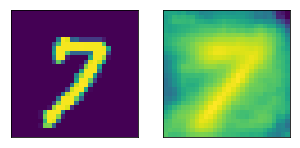

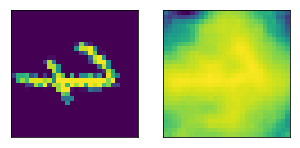

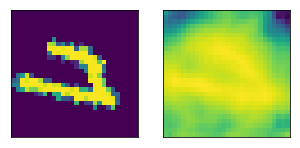

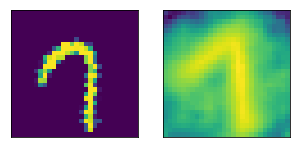

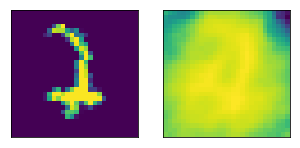

In [21]:
for i in range(num_samples):
  plt.figure(figsize=(5, 10))
  
  ax = plt.subplot(1, 2, 1)
  plt.imshow(test_original[i].reshape([28, 28]))
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  ax.set_xticks([])
  ax.set_yticks([])
  
  ax = plt.subplot(1, 2, 2)
  plt.imshow(test_recon[i].reshape([28, 28]))
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  ax.set_xticks([])
  ax.set_yticks([])

In [22]:
intermediate_layer_model = Model(inputs=vae_model.input, outputs=vae_model.get_layer(index = 11).output)
intermediate_output = intermediate_layer_model.predict(np.expand_dims(test_original[0], 0))

In [23]:
def plot_images(images):
  n = len(images)
  plt.figure(figsize=(20, 20 * n))
  for i in range(n):
      ax = plt.subplot(1, n, i + 1)
      plt.imshow(images[i])
      ax.set_xticklabels([])
      ax.set_yticklabels([])
      ax.set_xticks([])
      ax.set_yticks([])

In [24]:
intermediate_output

array([[-0.32727015,  0.36477467, -0.24180163, -1.2545645 ]],
      dtype=float32)

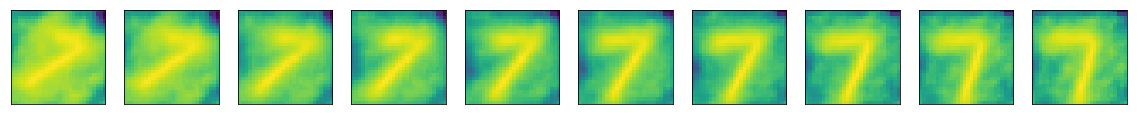

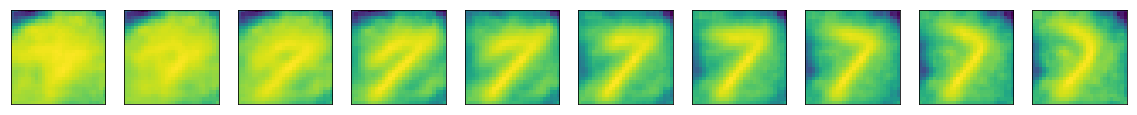

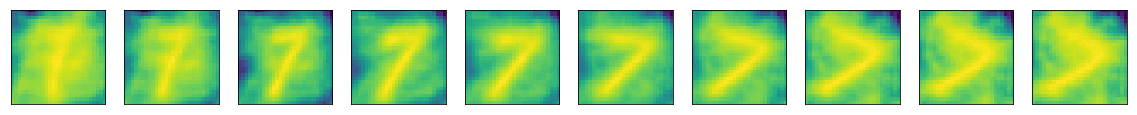

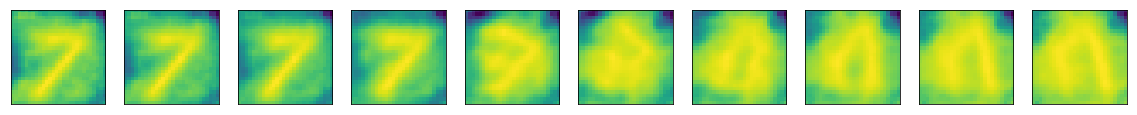

In [25]:
num_generated_images = 10
for dim in range(4):
    generated_vectors = []
    for new_val in np.linspace(-2, 2, num_generated_images):
        gen_vec = intermediate_output.copy()
        gen_vec[0, dim] = new_val
        generated_vectors.append(gen_vec)
    gen_images = decoder_model.predict(np.array(generated_vectors))  
    plot_images(gen_images.reshape([-1, 28, 28]))

### Observations
Looking at the generated images it looks like the latent dimensions control the following
1. Rotation
2. Angle between the horizontal stroke and slant stroke 
3. Length of the horizontal line
4. Horizontal Line running through 7

## References
1. https://www.tensorflow.org/tutorials/generative/cvae
2. https://blog.keras.io/building-autoencoders-in-keras.html